# Análisis de constantes de filtrado


En esta notebook, haremos un análisis de las constantes para filtrar palabras y usuarios. En el trabajo original utilizamos 40 ocurrencias y 5 usuarios para filtrar, pero puede que no sea el mejor 



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

df = pd.read_csv("../output/provinces_words.csv", index_col=0)
cant_palabras = [c for c in df.columns if re.match(r'.*ocurrencias$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*usuarios$', c)]

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["cant_palabra"] = df[cant_palabras].sum(axis=1)
df["cant_usuarios"] = df[cant_personas].sum(axis=1)


In [2]:
print("Total de palabras: {}".format(df.shape[0]))

Total de palabras: 2330114


Text(0.5,1,'Cantidad acumulada de palabras con menos de X ocurrencias')

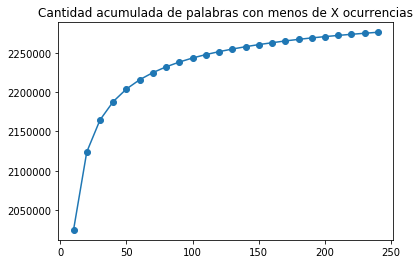

In [3]:
accum = {}
for i in range(1, 25):
    accum[10 * i] = len(df[df.cant_palabra < (10*i)])
pd.Series(accum).plot(marker="o")

plt.title("Cantidad acumulada de palabras con menos de X ocurrencias")

Text(0.5,1,'Cantidad acumulada de palabras con menos de X usuarios')

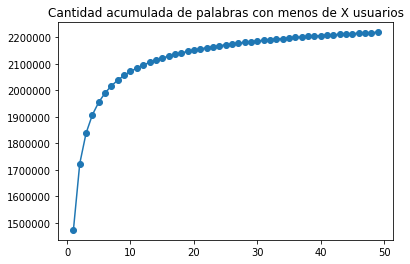

In [4]:
accum = {}
for i in range(1, 50, 1):
    accum[i] = len(df[df.cant_usuarios <= i])
pd.Series(accum).plot(marker="o")

plt.title("Cantidad acumulada de palabras con menos de X usuarios")

Pareciera tener algo de sentido elegir un filtro de entre 50 y 100 palabras, y alrededor de 10 personas.

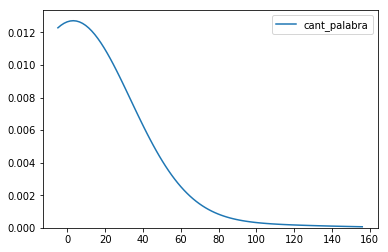

In [7]:
menores = df[df.cant_palabra <= 150]

sns.kdeplot(menores.cant_palabra, bw=2)

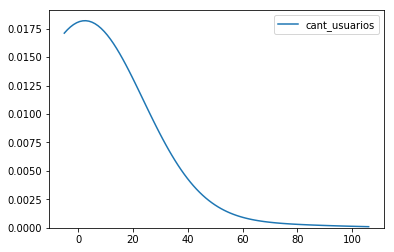

In [8]:

menos_de_100_usuarios = df[df.cant_usuarios <= 100]

sns.kdeplot(menos_de_100_usuarios.cant_usuarios, bw=2)

In [18]:
import numpy as np

chicas = df.sample(frac=0.01)

chicas["log_usuarios"] = np.log2(chicas.cant_usuarios)
chicas["log_palabra"] = np.log2(chicas.cant_palabra)

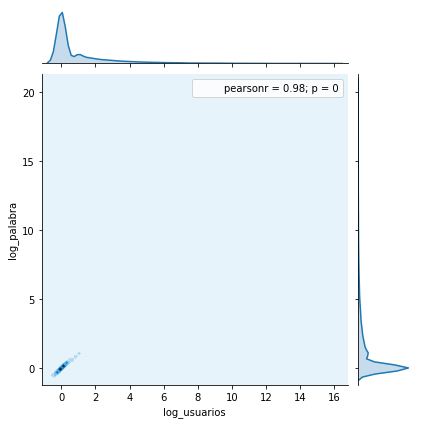

In [19]:
sns.jointplot(x="log_usuarios", y="log_palabra", data=chicas, kind="kde");


In [33]:
df[(df.cant_palabra > 80) & (df.cant_palabra < 100)].sample(20)["cant_palabra"]

palabra
corrompen       89
zonaaa          92
antítesis       88
incendiario     91
wiu             84
graciana        82
pullman         94
qerias          89
hacho           89
linndaaa        81
anarquistas     96
desfigurar      98
cancerígenos    81
ignoralos       87
pelié           95
yuru            90
rememorando     98
masacrar        82
faaav           96
yunes           85
Name: cant_palabra, dtype: int64